# Electronic band structure of graphene

- by Börge Göbel

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,5)

## 1. One-dimensional band structures

### 1.1 Free electrons: 

\\( E(k) = \frac{p^2}{2m} = \frac{\hbar^2}{2m}k^2\\) is the solution of the 

stationary Schrödinger equation without any potential \\( -\frac{\hbar^2}{2m}\phi''(x) = E\phi(x). \\)

The corresponding wave function is called a "plane wave" \\( \phi(x) \propto e^{ikx}.\\)

### 1.2 Quasi-free electrons in a periodic crystal:

Lattice periodic potential \\( V(x)=V(x+na) \\) of the periodic atomic lattice modifies the 

stationary Schrödinger equation \\( -\frac{\hbar^2}{2m}\phi''(x) = \left[E-V(x)\right]\phi(x). \\)

The wave functions become periodic "Bloch functions" (in \\( x \\) and \\( k \\)) and the eigenenergies change. 

- As a main effect, band crossings split up
- Still, periodicidy is conserved (periodicity is \\( k = \frac{2\pi}{a} \\) )

## 2. Two-dimensional band structure of graphene

### 2.1 Plot a graphene lattice

### 2.2 Tight-binding description & band structure

### 2.3 Cut through the Dirac points (linear band crossings)

Classical electrons: \\( E(k) = \frac{p^2}{2m} = \frac{\hbar^2}{2m}k^2\\)

Relativistic electrons: \\( E(k) = \pm\sqrt{p^2c^2+m_0^2c^4}\\)

Massless relativistic electrons: \\( E(k) = \pm pc\\)

- 2010: Nobel Prize Physics: Andre Geim and Konstantin Novoselov "for groundbreaking experiments regarding the two-dimensional material graphene"

## 3. Nanoribbons of graphene

### 3.1 Construct the lattice

### 3.2 Define and diagonalize the Hamilton matrix

\\( H = \begin{pmatrix} 
0 & pb & 0 & 0 & \dots \\ 
bp & 0 & br & 0 & \dots \\ 
0 & rb & 0 & rg & \dots \\ 
0 & 0 & gr & 0 & \dots \\
\vdots & \vdots & \vdots & \vdots & \ddots
\end{pmatrix} \\)

\\( 
pb = rg = \exp\left[ia_0\left(\frac{\sqrt{3}}{2}k_x+\frac{1}{2}k_y\right)\right] + \exp\left[ia_0\left(-\frac{\sqrt{3}}{2}k_x+\frac{1}{2}k_y\right)\right]\\
bp = gr = \exp\left[-ia_0\left(\frac{\sqrt{3}}{2}k_x+\frac{1}{2}k_y\right)\right] + \exp\left[-ia_0\left(-\frac{\sqrt{3}}{2}k_x+\frac{1}{2}k_y\right)\right]\\
br = gp = \exp\left(ia_0k_y\right)\\
rb = pg = \exp\left(-ia_0k_y\right)
\\)

### 3.3 Landau quantization & Quantum Hall effect (Metallic behavior due to edge channels)

- When we introduce a magnetic field along z, the hopping terms are modified

\\( \vec{A}(\vec{r}) = -B y \vec{e}_x \\)

\\( \vec{B}(\vec{r}) = \nabla \times \vec{A}(\vec{r}) \\)

additional factor: \\( \exp\left(i\int_\mathrm{hopping}\vec{A}\cdot\mathrm{d}\vec{r}\right) = \exp\left(-i(x_2-x_1) B \frac{y_1+y_2}{2}\right)\\)

- 2016: Nobel Prize Physics: David Thouless, Duncan Haldane and Michael Kosterlitz “for theoretical discoveries of topological phase transitions and topological phases of matter”

## 4. Twisted bilayers & Moiré patterns

In [2]:
a0 = 1.418 # [a0] = A = 10^(-10) m
latlength = np.sqrt(3.) * a0
z0 = -3.349

twist = 12
nmax = 4*twist

alpha =  2. * np.arctan(np.sqrt(3.)/2./(3.*twist+1.5))

print ("Twisting angle [°]:   ",alpha*180/np.pi)
print ("Number of atoms (analytical, per sublattice):   ", ((3.*twist+1.5)**2+(np.sqrt(3.)/2.)**2)*np.sin(np.pi/3.)/(3*np.sin(np.pi/3)))

Twisting angle [°]:    2.645908381192724
Number of atoms (analytical, per sublattice):    468.99999999999994


In [3]:
# lattice vectors sublattice 1
a1 = latlength * np.array([1., 0., 0.])
a2 = latlength * np.array([-0.5, np.sqrt(3.)/2., 0.])

# lattice vectors sublattice 2
b1 = np.array([ np.cos(alpha) * a1[0] - np.sin(alpha) * a1[1], np.sin(alpha) * a1[0] + np.cos(alpha) * a1[1], 0. ])
b2 = np.array([ np.cos(alpha) * a2[0] - np.sin(alpha) * a2[1], np.sin(alpha) * a2[0] + np.cos(alpha) * a2[1], 0. ])

# superlattice vectors (Moire pattern periodicity)
s1 = latlength/np.sqrt(3.) * np.array([-np.sqrt(3.)/2., 3.0*twist+1.5,0.])
s2 = np.array([np.cos(-2.*np.pi/3.)*s1[0]-np.sin(-2.*np.pi/3.)*s1[1], np.sin(-2.*np.pi/3.)*s1[0]+np.cos(-2.*np.pi/3.)*s1[1], 0.])

# reciprocal lattice vectors
r1 = 2 * np.pi * np.array([s2[1], -s2[0], 0.]) / abs(s1[0] * s2[1] - s1[1] * s2[0])
r2 = 2 * np.pi * np.array([-s1[1], s1[0], 0.]) / abs(s1[0] * s2[1] - s1[1] * s2[0])

In [4]:
#Coordinates sublattice 1 & 2 for layers 1 & 2
coords1a = np.array([i * a1 + j * a2 for i in range(-nmax-1, nmax+1) for j in range(-nmax-1, nmax+1)])
coords2a = np.array([i * b1 + j * b2 + [0.,0.,z0] for i in range(-nmax-1, nmax+1) for j in range(-nmax-1, nmax+1)])

coords1b = np.array([i * a1 + j * a2 + [0.,a0,0.] for i in range(-nmax-1, nmax+1) for j in range(-nmax-1, nmax+1)])
coords2b = np.array([i * b1 + j * b2 + [-np.sin(alpha)*a0,np.cos(alpha)*a0,z0] for i in range(-nmax-1, nmax+1) for j in range(-nmax-1, nmax+1)])

coords1 = np.concatenate((coords1a, coords1b), axis=0)
coords2 = np.concatenate((coords2a, coords2b), axis=0)

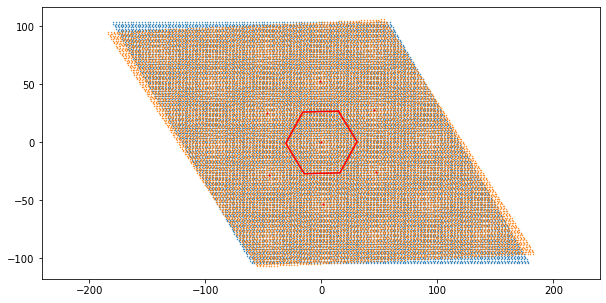

In [5]:
plt.axes().set_aspect('equal', 'datalim')
x1, y1, z1 = coords1.T
x2, y2, z2 = coords2.T
plt.scatter(x1, y1, s=30/twist**2)
plt.scatter(x2, y2, s=30/twist**2)

plt.scatter([0, s1[0], s2[0], -s1[0], -s2[0], s1[0]+s2[0], -s1[0]-s2[0]],
            [0, s1[1], s2[1], -s1[1], -s2[1], s1[1]+s2[1], -s1[1]-s2[1]],s=200/twist**2, 
            c='r')

# define corner points
corner1 = np.array(( 2*s1+1*s2)/3)
corner2 = np.array(( 1*s1-1*s2)/3)
corner3 = np.array((-1*s1-2*s2)/3)
corner4 = np.array((-2*s1-1*s2)/3)
corner5 = np.array((-1*s1+1*s2)/3)
corner6 = np.array(( 1*s1+2*s2)/3)

# plot the unit cell boundaries
plt.plot(
    [corner1[0], corner2[0], corner3[0], corner4[0], corner5[0], corner6[0], corner1[0]],
    [corner1[1], corner2[1], corner3[1], corner4[1], corner5[1], corner6[1], corner1[1]],
    c='r')

plt.savefig('lattice.png', dpi=300)